In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest,chi2_contingency,ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Files/data_final.csv",index_col=0)

In [3]:
df.sample(20)

,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
82,no,unknown,119.0,3,3,life sciences,307,1,H,76.0,3,3,sales executive,3,divorced,9647,0,unknown,12,3,3,2,0,6,2,16,0,5,13,1985,yes,307
1281,no,travel rarely,1001.0,15,3,unknown,0,1,M,43.0,3,3,healthcare representative,1,married,9262,8,no,16,3,1,1,0,1,2,1,0,0,0,1980,yes,5581
902,no,travel rarely,1349.0,23,3,life sciences,0,1,M,90.0,3,1,research scientist,4,divorced,3032,1,no,22,4,2,2,0,3,1,3,0,0,2,1997,yes,12929
155,no,unknown,1326.0,3,3,other,1478,4,H,81.0,1,2,sales executive,1,single,15891,3,no,18,0,4,0,15,2,3,13,0,3,12,1989,yes,1478
1448,no,travel rarely,352.0,6,1,unknown,1865,4,H,87.0,2,1,human resources,2,married,15434,1,no,11,3,4,0,0,3,3,1,0,0,0,1994,unknown,1865
937,no,unknown,1090.0,10,3,unknown,0,4,H,83.0,3,1,sales representative,2,unknown,17967,1,no,14,3,4,2,0,2,3,2,0,2,2,1994,no,18305
173,no,travel rarely,722.0,33,1,marketing,2056,3,M,60.0,2,4,sales executive,4,unknown,8828,0,unknown,11,3,1,1,0,2,2,20,0,9,6,1984,unknown,2056
135,no,travel rarely,527.0,8,2,other,944,1,M,51.0,3,3,laboratory technician,2,married,22477,4,unknown,11,3,3,1,29,3,2,26,0,1,7,1974,no,944
827,yes,travel frequently,1150.0,16,4,unknown,179,1,H,53.0,1,3,manufacturing director,4,unknown,25150,2,unknown,15,3,4,0,18,2,3,4,0,0,3,1972,no,179
712,no,unknown,376.0,19,4,unknown,799,4,M,66.0,3,2,manufacturing director,1,divorced,22670,9,yes,11,0,2,2,0,4,3,5,0,1,4,1969,unknown,799


**Establecer hipótesis**

**Hipótesis nula**[HO]: No hay cambios significativos entre los dos grupos

**Hipótesis alternativa**[H1]: Hay cambios significativos entre lso dos grupos

Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa.

**Grupos**

- Control: Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5
- Variante: Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala

**Métrica**

- Attrition:

No: empleado no ha dejado la empresa
        
Yes: empleado ha dejado la empresa

In [4]:
df.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Dailyrate', 'Distancefromhome',
       'Education', 'Educationfield', 'Environmentsatisfaction', 'Gender',
       'Hourlyrate', 'Jobinvolvement', 'Joblevel', 'Jobrole',
       'Jobsatisfaction', 'Maritalstatus', 'Monthlyrate', 'Numcompaniesworked',
       'Overtime', 'Percentsalaryhike', 'Performancerating',
       'Relationshipsatisfaction', 'Stockoptionlevel', 'Trainingtimeslastyear',
       'Worklifebalance', 'Yearsatcompany', 'Yearssincelastpromotion',
       'Yearswithcurrmanager', 'Datebirth', 'Remotework'],
      dtype='object')

In [3]:
# Paso1. Dividimos a los empleados en los grupos A y B 

def asignar_grupos(numero):
    if numero >= 3:
        return "grupo A"
    else:
        return "grupo B"
    

df["Jobsatisfaction_ab"]= df["Jobsatisfaction"].apply(asignar_grupos)
df["Environmentsatisfactionab"]=df["Environmentsatisfaction"].apply(asignar_grupos)
df["Relationshipsatisfaction_ab"]=df["Relationshipsatisfaction"].apply(asignar_grupos)
df["Jobinvolvement_ab"]=df["Jobinvolvement"].apply(asignar_grupos)
df["Worklifebalance_ab"]=df["Worklifebalance"].apply(asignar_grupos)

In [4]:
# Calculamos de la tasa de rotación

df_rotacion = df[df["Attrition"] == "Yes"]
tasa_rotacion = df.shape[0] / df.shape[0]
print(f"la tasa de rotación del grupo de control es:{tasa_rotacion}")

# Tasa de rotación en grupo variante
df_variante_rotacion = df[df["Attrition"] == "Yes"]
tasa_rotacion_variante = df_variante_rotacion.shape[0] / df.shape[0]
print(f"la tasa de rotación del grupo variante es:{tasa_rotacion_variante}")

la tasa de rotación del grupo de control es:1.0
la tasa de rotación del grupo variante es:0.15952080706179067


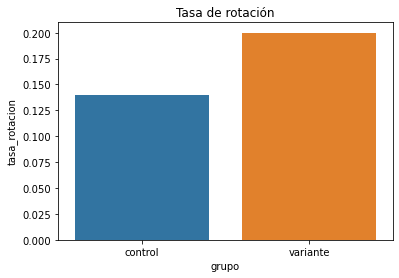

In [10]:
# Gráfico para visualizar la diferencia en la tasa de rotación

# Tasa de conversión
rota = {"grupo":["control", "variante"], "tasa_rotacion": [0.14, 0.2]}
df_rotacion = pd.DataFrame(rota)

# Gráfica de rotacion
sns.barplot(x="grupo", y="tasa_rotacion", data=df_rotacion)
plt.title("Tasa de rotación");

La tasa de rotación es mayor en el grupo variante (satisfacción bajo)

In [22]:
# Tabla de contingencia
contingency_table = pd.crosstab(df["Jobsatisfaction_ab"], df['Attrition'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(p_value)

# Imprimir resultado 
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que si que existe una diferencia entre los grupos 
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación de ambos grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas
          """)

0.0035330175381607944
Hay una diferencia significativa en la tasa de rotación de ambos grupos.

 ---------- 


          Los resultados sugieren que si que existe una diferencia entre los grupos 
          


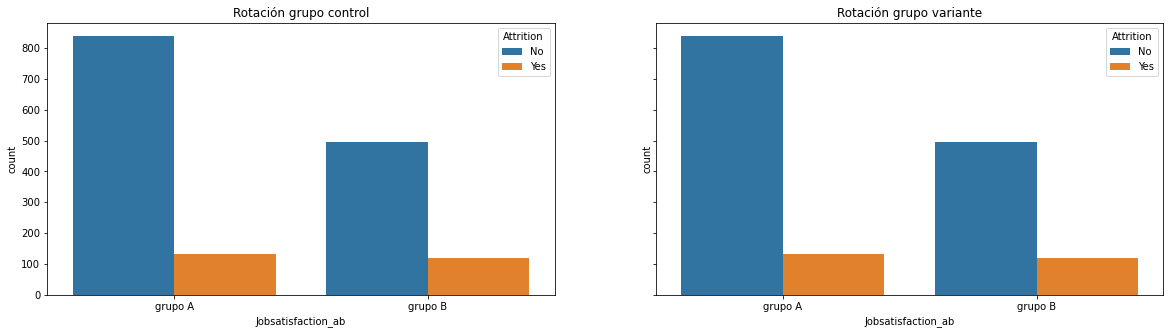

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5),sharey=True)



# Gráfico 1: Rotación del grupo control
sns.countplot(x="Jobsatisfaction_ab", hue="Attrition", data=df, ax=axes[0])
axes[0].set_title("Rotación grupo control")

# Gráfico 2: Rotación del grupo variante
sns.countplot(x="Jobsatisfaction_ab", hue="Attrition", data=df, ax=axes[1])
axes[1].set_title("Rotación grupo variante");

**Análisis estadístico para:**

Verificar: 
- Normalidad
- Homogeneidad de Varianzas 
- Independencia

In [7]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [6]:
# Convertir "Sí" a 1 y "No" a 0
df["Attrition_numeric"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Verificar si la conversión fue exitosa
print(df["Attrition_numeric"].head())

0    0
1    0
2    0
3    0
4    0
Name: Attrition_numeric, dtype: int64


In [10]:
# NORMALIDAD (Shapiro)

def normalidad(dataframe, columna):
    if dataframe[columna].dtype != "object":
        statistic, p_value = stats.shapiro(dataframe[columna])
        if p_value > 0.05:
            print(f"Para la columna {columna} los datos siguen una distribución normal.")
        else:
         print(f"Para la columna {columna} los datos no siguen una distribución normal.")
    else:
        print(f"La columna {columna} no contiene datos numéricos, no se puede realizar el test de normalidad.")

normalidad(df, "Attrition_numeric")


Para la columna Attrition_numeric los datos no siguen una distribución normal.


Si 'attrition' no sigue una distribución normal, tendríamos que hacer la prueba de ManWhitney 

In [14]:
cross_tab = pd.crosstab(df["Attrition"],df["Jobsatisfaction_ab"])
cross_tab

Jobsatisfaction_ab,grupo A,grupo B
Attrition,,
No,839,494
Yes,134,119


**HO**: No existe relación entre la satisfacción y la continuidad en la empresa.


**H1**: Existe relación entre la satisfacción y la continuidad en la empresa.

In [13]:
chi2, p_value, _, _ = chi2_contingency(cross_tab)

alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa entre la satisfacción y la continuidad en la empresa")
    print("\n ---------- \n")
    
else:
    print("No hay evidencia de una diferencia significativa entre la continuidad en la empresa y la satisfacción")
    print("\n ---------- \n")


Hay una diferencia significativa entre la satisfacción y la continuidad en la empresa

 ---------- 



< 0.05 Rechazamos hipótesis nula, hay diferencia en la tasa de conversión entre los grupos AD y PSA
> 0.05 Aceptamos  la hipótesis nula, no hay diferencia en la tasa de conversión

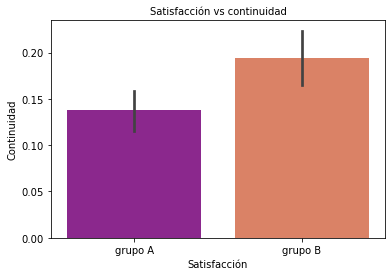

In [18]:
sns.barplot(x="Jobsatisfaction_ab", y="Attrition_numeric", data=df,  palette = "plasma");
plt.xlabel('Satisfacción')
plt.ylabel('Continuidad')
plt.title('Satisfacción vs continuidad', fontsize = 10);

In [9]:
df.columns

Index(['Attrition', 'Businesstravel', 'Dailyrate', 'Distancefromhome',
       'Education', 'Educationfield', 'Employeenumber',
       'Environmentsatisfaction', 'Gender', 'Hourlyrate', 'Jobinvolvement',
       'Joblevel', 'Jobrole', 'Jobsatisfaction', 'Maritalstatus',
       'Monthlyrate', 'Numcompaniesworked', 'Overtime', 'Percentsalaryhike',
       'Performancerating', 'Relationshipsatisfaction', 'Stockoptionlevel',
       'Totalworkingyears', 'Trainingtimeslastyear', 'Worklifebalance',
       'Yearsatcompany', 'Yearsincurrentrole', 'Yearssincelastpromotion',
       'Yearswithcurrmanager', 'Datebirth', 'Remotework', 'Employee_id'],
      dtype='object')

In [97]:
analisis_trabajador= df.loc[:, ["Environmentsatisfaction", "Gender"]].reset_index(drop=True)
analisis_trabajador.sample(30)

,Environmentsatisfaction,Gender
1542,2,H
366,3,H
17,3,M
2,3,H
114,2,H
959,4,M
660,41,M
56,2,M
1347,2,M
1163,3,H


In [8]:
genero_satisfaccion = df.groupby(['Environmentsatisfaction', 'Gender']).size().reset_index(name='Count')
genero_satisfaccion

,Environmentsatisfaction,Gender,Count
0,1,H,195
1,1,M,132
2,2,H,189
3,2,M,127
4,3,H,281
5,3,M,185
6,4,H,289
7,4,M,188


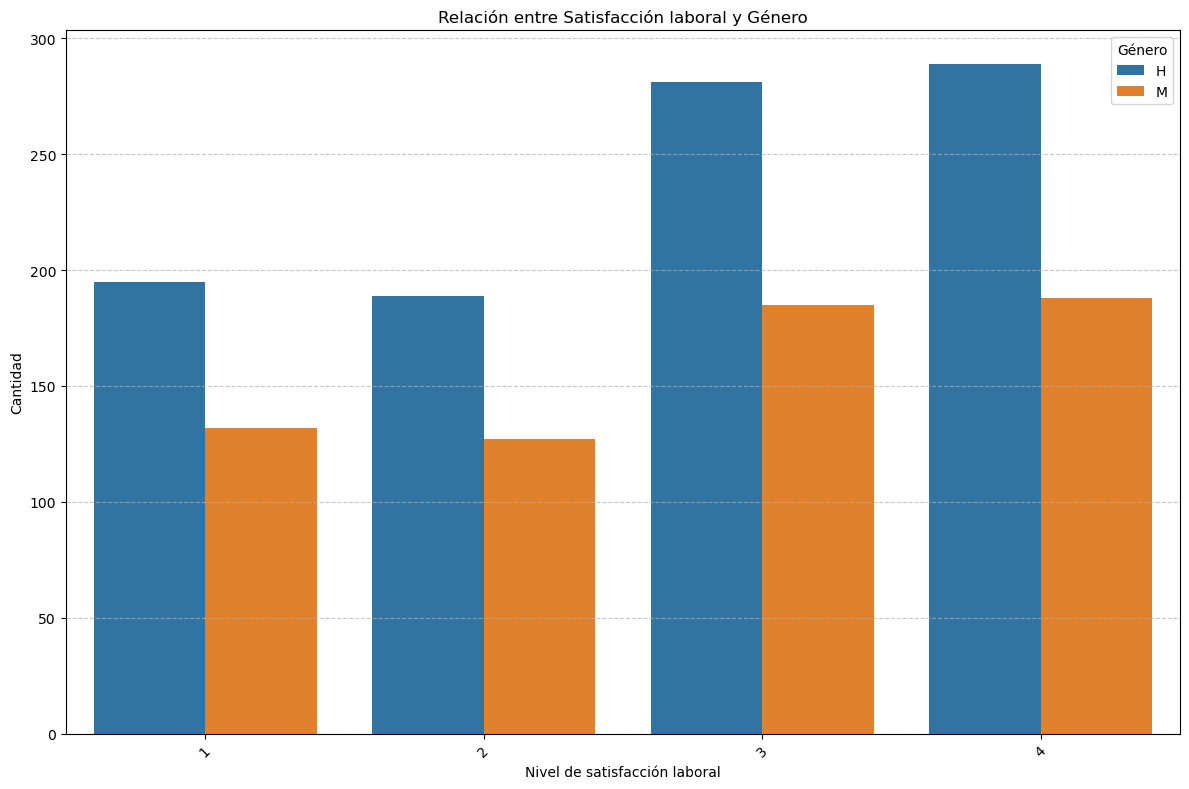

In [4]:
genero_satisfaccion = df.groupby(['Environmentsatisfaction', 'Gender']).size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Environmentsatisfaction', y='Count', hue='Gender', data=genero_satisfaccion)
plt.title('Relación entre Satisfacción laboral y Género')
plt.xlabel('Nivel de satisfacción laboral')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de grid en el eje y
plt.legend(title='Género')
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()

In [5]:
niveles=  {1: 'bajo', 2: 'medio', 3: 'alto', 4: 'máximo'}
def assing_labels(row):
    if int(row['Environmentsatisfaction']) in niveles:
        
        row['labels'] = niveles[row['Environmentsatisfaction']]
    else:
        row['labels'] = ""
    return row
genero_satisfaccion = genero_satisfaccion.apply(assing_labels, axis=1)
genero_satisfaccion

,Environmentsatisfaction,Gender,Count,labels
0,1,H,195,bajo
1,1,M,132,bajo
2,2,H,189,medio
3,2,M,127,medio
4,3,H,281,alto
5,3,M,185,alto
6,4,H,289,máximo
7,4,M,188,máximo


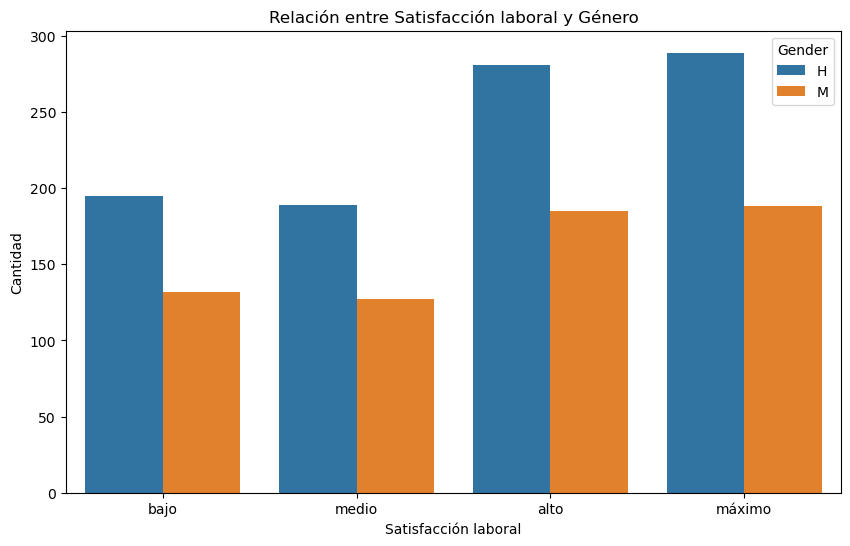

In [6]:
# niveles=  {1: 'bajo', 2: 'medio', 3: 'alto', 4: 'máximo'}
# genero_satisfaccion['Environmentsatisfaction'] = genero_satisfaccion['Environmentsatisfaction'].map(niveles)

# genero_satisfaccion = df.groupby(['Environmentsatisfaction', 'Gender']).size().reset_index(name='Count')
# genero_satisfaccion

plt.figure(figsize=(10, 6))
sns.barplot(x='labels', y='Count', hue='Gender', data=genero_satisfaccion , )
plt.title('Relación entre Satisfacción laboral y Género')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Cantidad')
plt.show()

In [90]:
df["Jobinvolvement"].unique()

array([3, 2, 4, 1])

In [32]:
genero_satisfaccion = df.groupby(['Jobinvolvement', 'Gender']).size().reset_index(name='Count')
genero_satisfaccion

,Jobinvolvement,Gender,Count
0,1,H,55
1,1,M,33
2,2,H,233
3,2,M,168
4,3,H,566
5,3,M,369
6,4,H,100
7,4,M,62


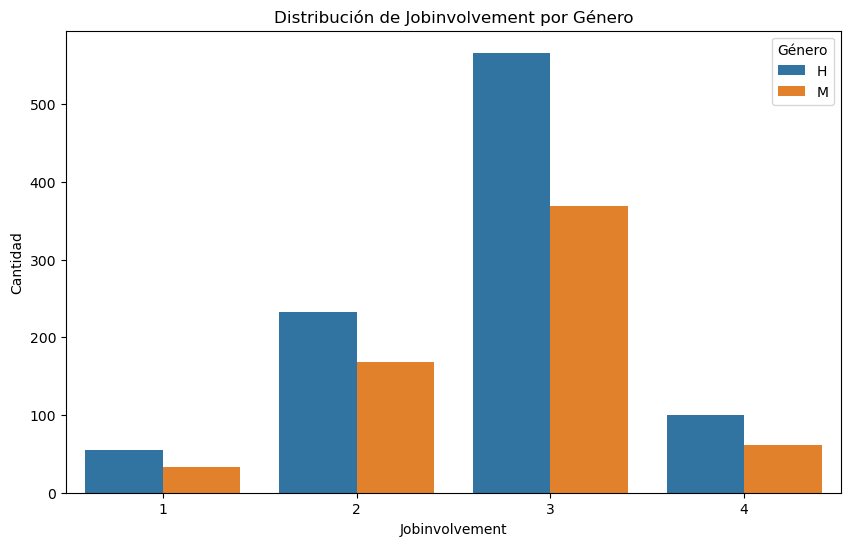

In [89]:
genero_satisfaccion = df.groupby(['Jobinvolvement', 'Gender']).size().reset_index(name='Count')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Jobinvolvement', y='Count', hue='Gender', data=genero_satisfaccion)
plt.title('Distribución de Jobinvolvement por Género')
plt.xlabel('Jobinvolvement')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()